In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Scientific computing
import scipy
# Machine learning
import sklearn
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import ttest_1samp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv(r"F:\Climate Paper\Data\My Research Data.csv")

# Print the first five rows of the DataFrame
df.head()

,year,Bhutan,Bangladesh,India,Nepal,Pakistan
0,1850,0.23,6.34,83.03,1.14,-0.03
1,1851,0.21,5.41,64.25,1.04,-0.05
2,1852,0.37,5.27,54.26,1.00,-0.07
3,1853,0.28,5.06,48.19,0.97,-0.10
4,1854,0.27,5.25,43.87,0.95,-0.11


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume 'df' is your DataFrame containing emissions data with the columns ['year', 'Bhutan', 'Bangladesh', 'India', 'Nepal', 'Pakistan']
# If 'year' is your time feature, you might not need to scale it directly, but scale the other emission data

# Drop the 'year' column and split into features (X) and target (y)
X = df.drop(columns=['year'])
y = df['India']  # Example: predicting emissions for India (you can change to any country)

# Handle missing values if any
X.fillna(X.mean(), inplace=True)  # Fill missing values with the mean (you can also use other strategies)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, R-squared: {r2_lr}")

Linear Regression - MSE: 3.2098975622273034e-27, R-squared: 1.0


In [5]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the decision tree regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor - MSE: {mse_dt}, R-squared: {r2_dt}")

Decision Tree Regressor - MSE: 8.56286000000001, R-squared: 0.9967723513316583


In [6]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - MSE: {mse_rf}, R-squared: {r2_rf}")


Random Forest Regressor - MSE: 3.863255230857213, R-squared: 0.9985438007159594


In [7]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the gradient boosting regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor - MSE: {mse_gb}, R-squared: {r2_gb}")

Gradient Boosting Regressor - MSE: 2.110617333351257, R-squared: 0.9992044327216175


In [8]:
from sklearn.svm import SVR

# Initialize the support vector regressor
svm_model = SVR(kernel='rbf')

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"Support Vector Regressor - MSE: {mse_svm}, R-squared: {r2_svm}")

Support Vector Regressor - MSE: 2020.510451935031, R-squared: 0.23839723298540694


In [9]:
import xgboost as xgb

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor - MSE: {mse_xgb}, R-squared: {r2_xgb}")

XGBoost Regressor - MSE: 4.402606693915955, R-squared: 0.9983404998291634


In [10]:
from keras.models import Sequential
from keras.layers import Dense

# Initialize the neural network
nn_model = Sequential()

# Add layers to the neural network
nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Predict on the test set
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network - MSE: {mse_nn}, R-squared: {r2_nn}")

Epoch 1/100


C:\Miniconda3\envs\jupyter-nb\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7699.8525
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7936.7734 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7706.5400 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7751.3398 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8494.3369  
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8210.0381 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8084.2158 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7795.8726 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8036.0508 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8642.8809  
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7807.0708 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7678.9932 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6569.8843 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7264.3311 
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [11]:
# Store all the MSE and R-squared values in a dictionary
model_comparison = {
    'Linear Regression': [mse_lr, r2_lr],
    'Decision Tree': [mse_dt, r2_dt],
    'Random Forest': [mse_rf, r2_rf],
    'Gradient Boosting': [mse_gb, r2_gb],
    'SVM': [mse_svm, r2_svm],
    'XGBoost': [mse_xgb, r2_xgb],
    'Neural Network': [mse_nn, r2_nn]
}

# Display model comparison
model_comparison_df = pd.DataFrame(model_comparison, index=['MSE', 'R-squared']).T
print(model_comparison_df)

                            MSE  R-squared
Linear Regression  3.209898e-27   1.000000
Decision Tree      8.562860e+00   0.996772
Random Forest      3.863255e+00   0.998544
Gradient Boosting  2.110617e+00   0.999204
SVM                2.020510e+03   0.238397
XGBoost            4.402607e+00   0.998340
Neural Network     1.697911e+02   0.936000


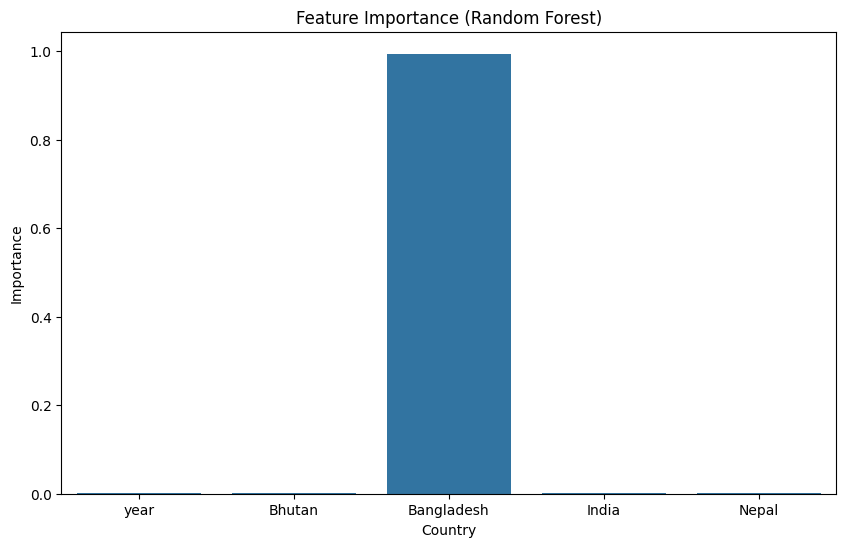

In [12]:
# For Random Forest
feature_importances = rf_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=df.columns[:-1], y=feature_importances)  # Excluding the 'year' column
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Country')
plt.ylabel('Importance')
plt.show()

C:\Users\WindowS 10\AppData\Local\Temp\ipykernel_10228\1194152463.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_comparison_df.index, y=model_comparison_df['MSE'], ax=axes[0], palette='viridis')
C:\Users\WindowS 10\AppData\Local\Temp\ipykernel_10228\1194152463.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\WindowS 10\AppData\Local\Temp\ipykernel_10228\1194152463.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_comparison_df.index, y=model_comparison_df['R-squared'], ax=axes[1], palette='viridis')
C:\User

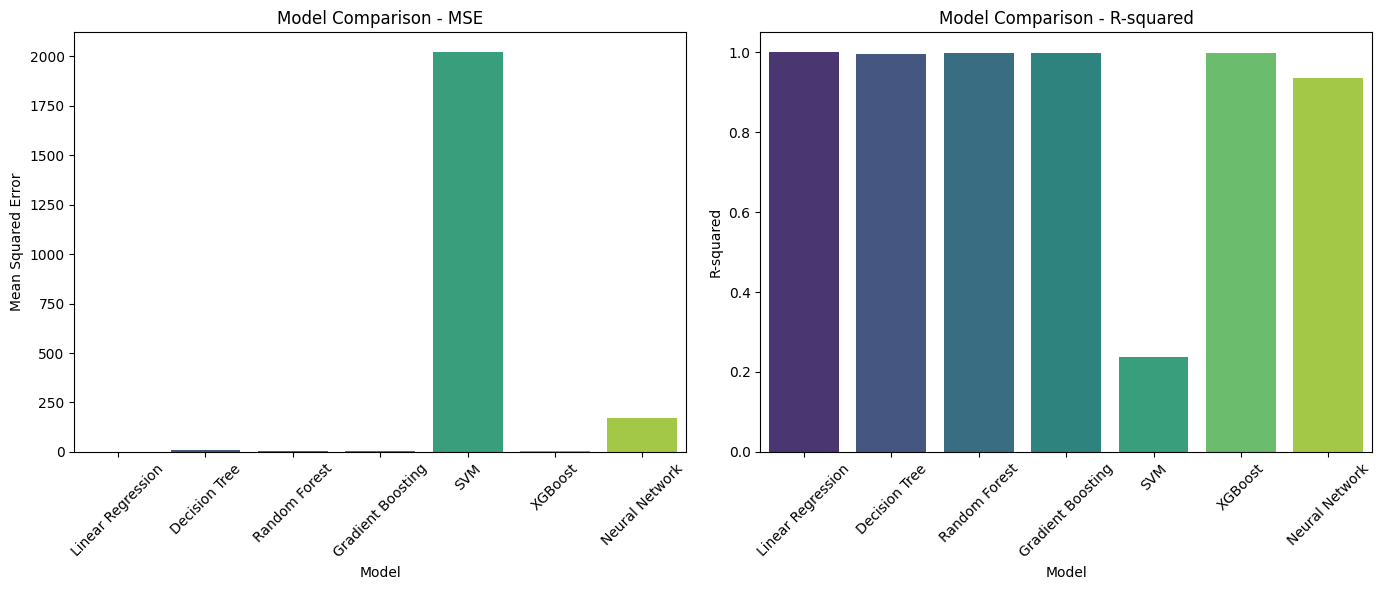

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model performance metrics (MSE and R-squared) for each model
model_comparison = {
    'Linear Regression': [mse_lr, r2_lr],
    'Decision Tree': [mse_dt, r2_dt],
    'Random Forest': [mse_rf, r2_rf],
    'Gradient Boosting': [mse_gb, r2_gb],
    'SVM': [mse_svm, r2_svm],
    'XGBoost': [mse_xgb, r2_xgb],
    'Neural Network': [mse_nn, r2_nn]
}

# Create a DataFrame for easy plotting
model_comparison_df = pd.DataFrame(model_comparison, index=['MSE', 'R-squared']).T

# Plotting the comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot MSE (Mean Squared Error)
sns.barplot(x=model_comparison_df.index, y=model_comparison_df['MSE'], ax=axes[0], palette='viridis')
axes[0].set_title('Model Comparison - MSE')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot R-squared
sns.barplot(x=model_comparison_df.index, y=model_comparison_df['R-squared'], ax=axes[1], palette='viridis')
axes[1].set_title('Model Comparison - R-squared')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R-squared')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Display the plots
plt.tight_layout()
plt.show()

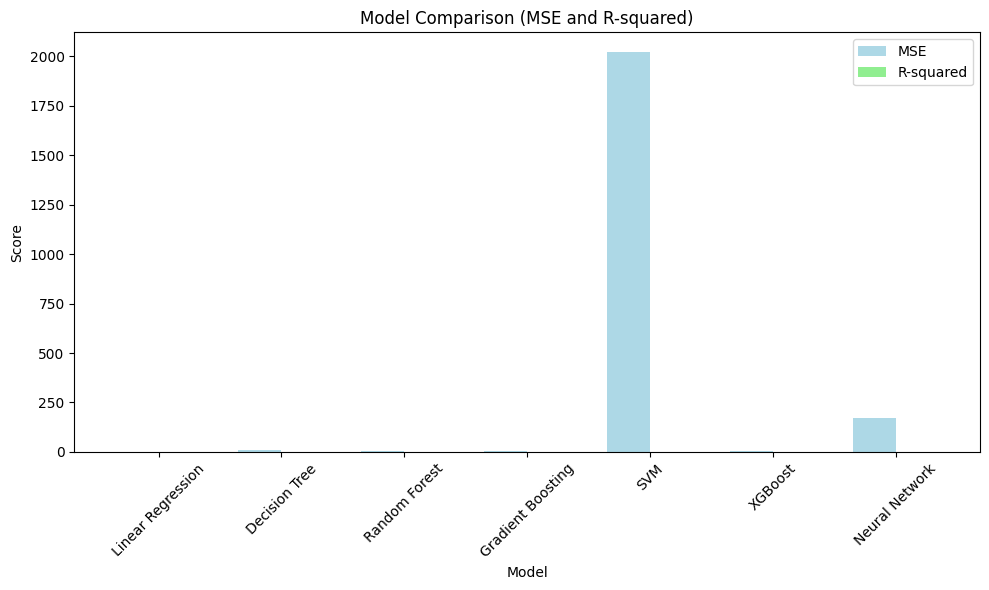

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Model performance metrics (MSE and R-squared) for each model
model_comparison = {
    'Linear Regression': [mse_lr, r2_lr],
    'Decision Tree': [mse_dt, r2_dt],
    'Random Forest': [mse_rf, r2_rf],
    'Gradient Boosting': [mse_gb, r2_gb],
    'SVM': [mse_svm, r2_svm],
    'XGBoost': [mse_xgb, r2_xgb],
    'Neural Network': [mse_nn, r2_nn]
}

# Create a DataFrame for easy plotting
model_comparison_df = pd.DataFrame(model_comparison, index=['MSE', 'R-squared']).T

# Plotting the comparison
fig, ax = plt.subplots(figsize=(10, 6))

# Set the position of the bars
bar_width = 0.35
index = np.arange(len(model_comparison_df))

# Plot MSE and R-squared side by side for each model
bar1 = ax.bar(index, model_comparison_df['MSE'], bar_width, label='MSE', color='lightblue')
bar2 = ax.bar(index + bar_width, model_comparison_df['R-squared'], bar_width, label='R-squared', color='lightgreen')

# Adding labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Comparison (MSE and R-squared)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_comparison_df.index, rotation=45)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

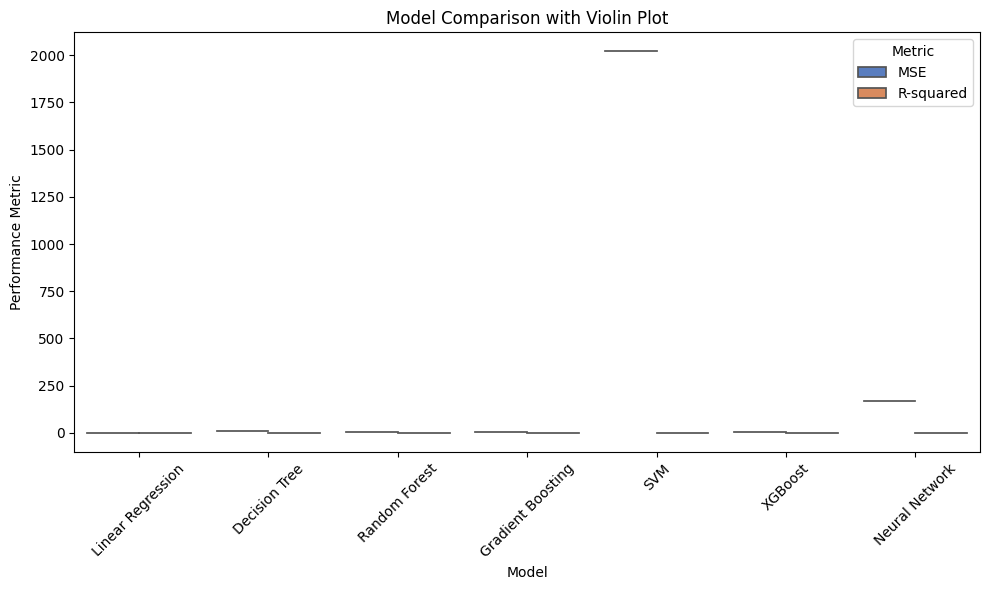

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine MSE and R-squared values for each model in a long-format DataFrame for plotting
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'XGBoost', 'Neural Network']
metrics = ['MSE', 'R-squared']
values = [
    [mse_lr, r2_lr],
    [mse_dt, r2_dt],
    [mse_rf, r2_rf],
    [mse_gb, r2_gb],
    [mse_svm, r2_svm],
    [mse_xgb, r2_xgb],
    [mse_nn, r2_nn]
]

# Create a DataFrame for Violin Plot
import pandas as pd
df = pd.DataFrame(values, columns=metrics, index=model_names)
df = df.reset_index().melt(id_vars="index", value_vars=metrics, var_name="Metric", value_name="Value")

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x='index', y='Value', hue='Metric', data=df, split=True, inner="quart", palette="muted")
plt.title('Model Comparison with Violin Plot')
plt.xlabel('Model')
plt.ylabel('Performance Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

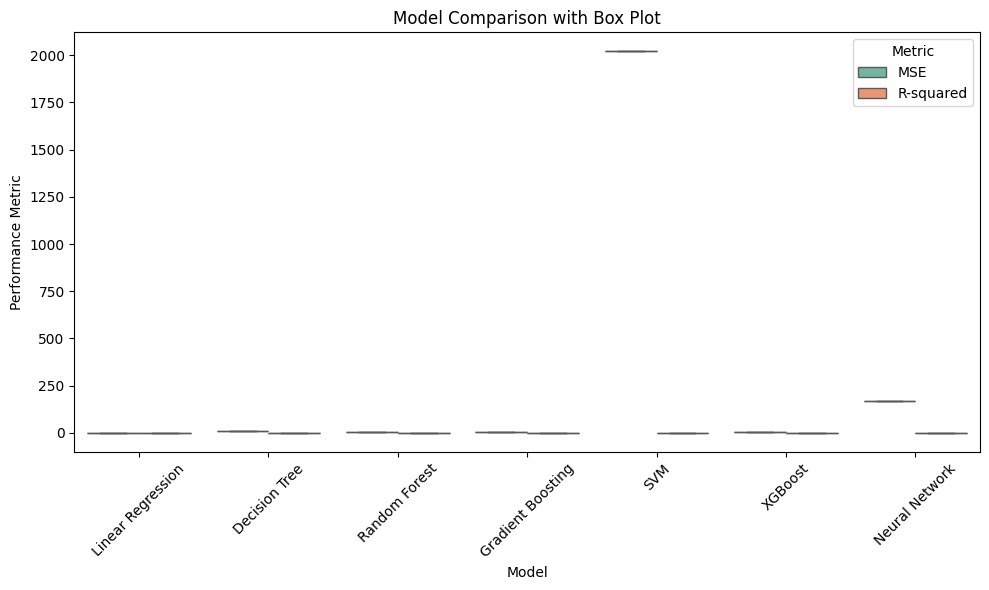

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for Box Plot
df_box = pd.DataFrame(values, columns=metrics, index=model_names)
df_box = df_box.reset_index().melt(id_vars="index", value_vars=metrics, var_name="Metric", value_name="Value")

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='index', y='Value', hue='Metric', data=df_box, palette="Set2")
plt.title('Model Comparison with Box Plot')
plt.xlabel('Model')
plt.ylabel('Performance Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


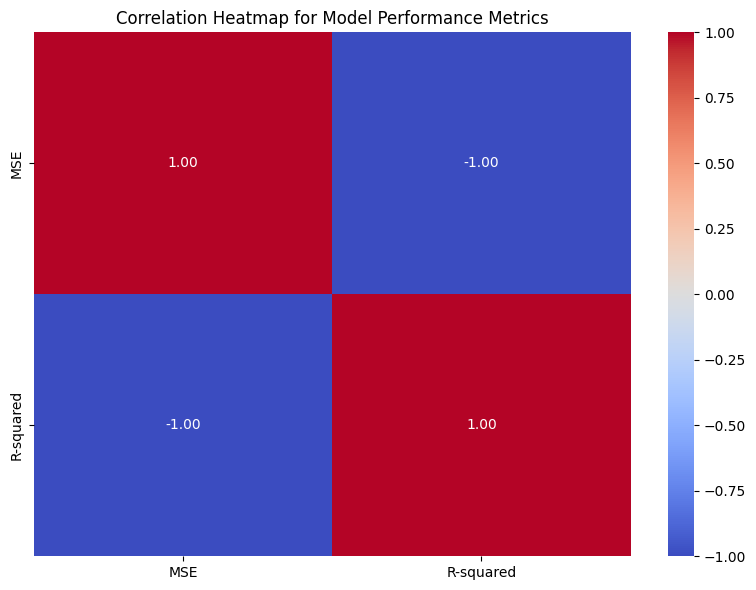

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame with model performance metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'MSE': [mse_lr, mse_dt, mse_rf, mse_gb, mse_svm, mse_xgb, mse_nn],
    'R-squared': [r2_lr, r2_dt, r2_rf, r2_gb, r2_svm, r2_xgb, r2_nn]
})

# Correlation heatmap for performance metrics
correlation_matrix = metrics_df.drop('Model', axis=1).corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap for Model Performance Metrics')
plt.tight_layout()
plt.show()

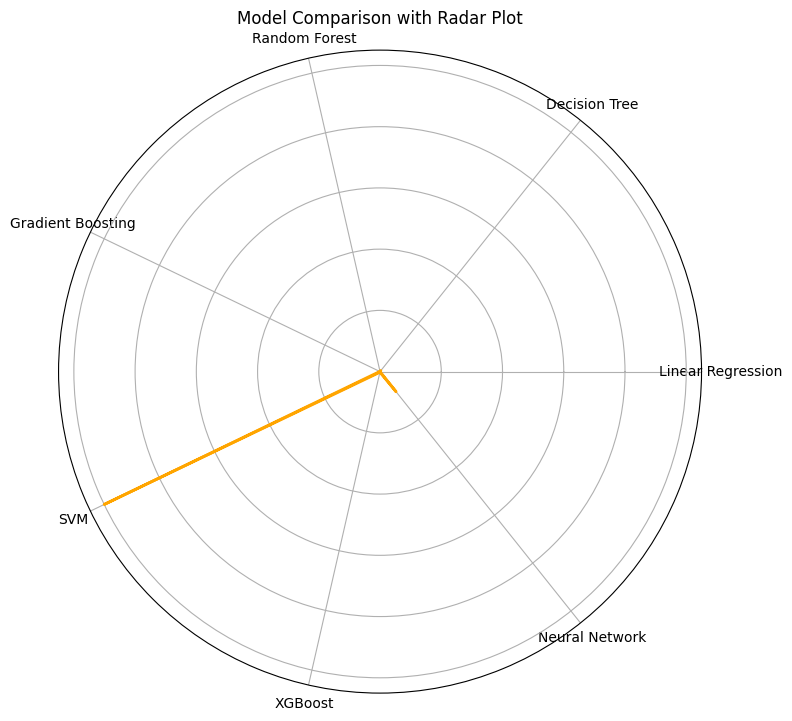

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
labels = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'XGBoost', 'Neural Network']

# Performance metrics (MSE and R-squared)
metrics = np.array([mse_lr, mse_dt, mse_rf, mse_gb, mse_svm, mse_xgb, mse_nn])

# Normalize MSE for visualization (lower is better)
metrics_normalized = metrics / max(metrics)

# Create the Radar plot
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
metrics_normalized = np.concatenate((metrics_normalized, [metrics_normalized[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, metrics_normalized, color='orange', alpha=0.25)
ax.plot(angles, metrics_normalized, color='orange', linewidth=2)

# Add labels
ax.set_yticklabels([])  # Hide radial ticks
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, rotation=45)

plt.title('Model Comparison with Radar Plot')
plt.tight_layout()
plt.show()

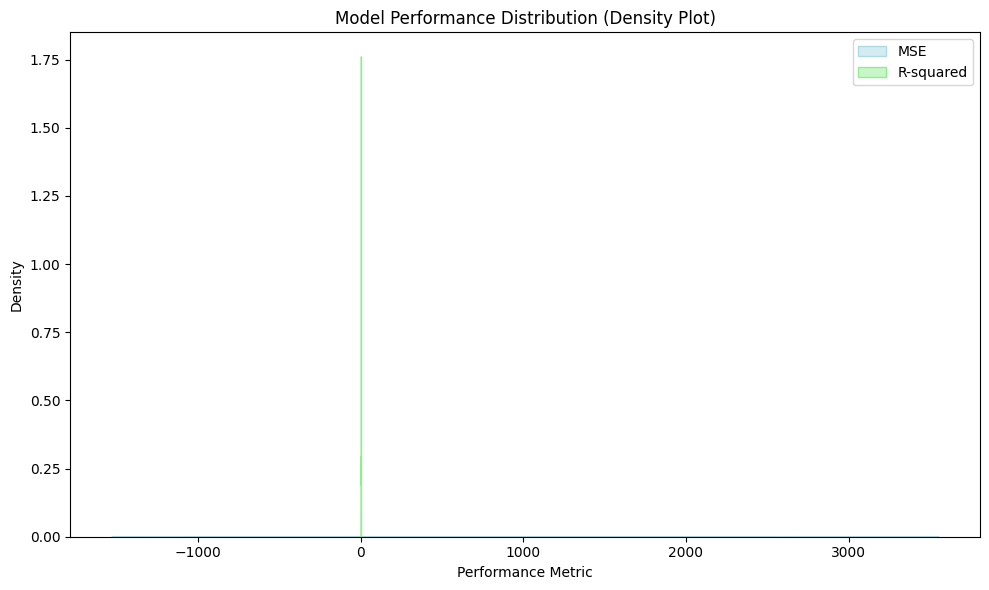

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the metrics into a single DataFrame
metrics_combined = {
    'Model': model_names,
    'MSE': [mse_lr, mse_dt, mse_rf, mse_gb, mse_svm, mse_xgb, mse_nn],
    'R-squared': [r2_lr, r2_dt, r2_rf, r2_gb, r2_svm, r2_xgb, r2_nn]
}

metrics_combined_df = pd.DataFrame(metrics_combined)

# Plotting density plots
plt.figure(figsize=(10, 6))
sns.kdeplot(metrics_combined_df['MSE'], label='MSE', fill=True, color='lightblue', alpha=0.5)
sns.kdeplot(metrics_combined_df['R-squared'], label='R-squared', fill=True, color='lightgreen', alpha=0.5)

plt.title('Model Performance Distribution (Density Plot)')
plt.xlabel('Performance Metric')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

# Model Tuning and Evaluation

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Define the model
model = RandomForestRegressor()

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: -12.61546206754772


In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the model
model = RandomForestRegressor()

# Define parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the random search
random_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 130}
Best Score: -14.011089888697708


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Define the model
model = RandomForestRegressor(n_estimators=100, max_depth=20)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print mean and standard deviation of cross-validation scores
print(f"Mean CV Score: {-cv_scores.mean()}")
print(f"Standard Deviation: {cv_scores.std()}")

Mean CV Score: 23.90798815503993
Standard Deviation: 27.745125307201096


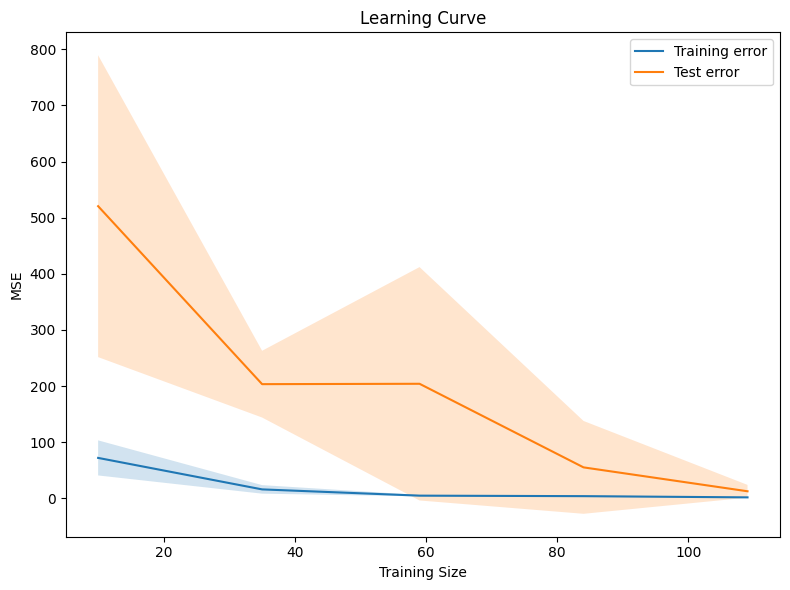

In [24]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Define the model
model = RandomForestRegressor(n_estimators=100, max_depth=20)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Calculate mean and standard deviation for plotting
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Test error')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend()
plt.tight_layout()
plt.show()

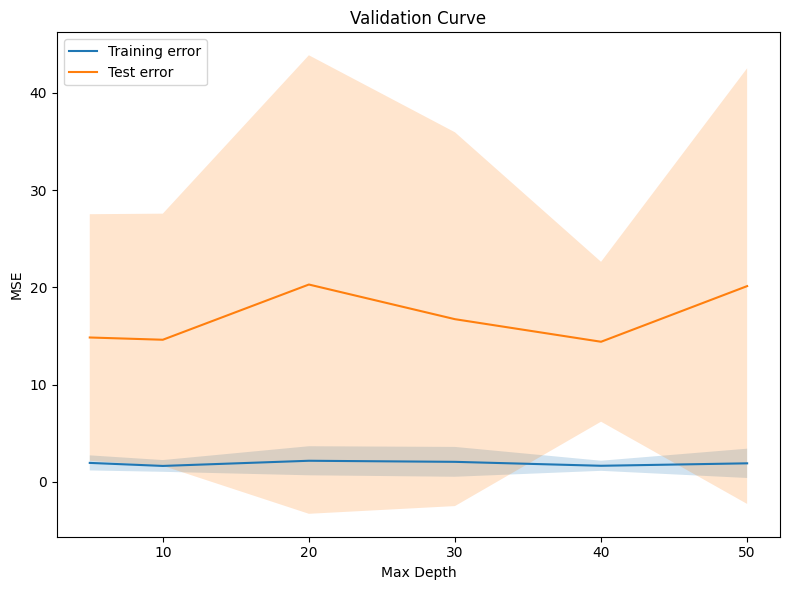

In [25]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

# Define the model
model = RandomForestRegressor(n_estimators=100)

# Define the hyperparameter values to test (e.g., max_depth)
param_range = [5, 10, 20, 30, 40, 50]

# Generate validation curve data
train_scores, test_scores = validation_curve(model, X_train, y_train, param_name='max_depth', param_range=param_range, cv=5, scoring='neg_mean_squared_error')

# Calculate mean and std for plotting
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot the validation curve
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label='Training error')
plt.plot(param_range, test_mean, label='Test error')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2)

plt.xlabel('Max Depth')
plt.ylabel('MSE')
plt.title('Validation Curve')
plt.legend()
plt.tight_layout()
plt.show()